In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

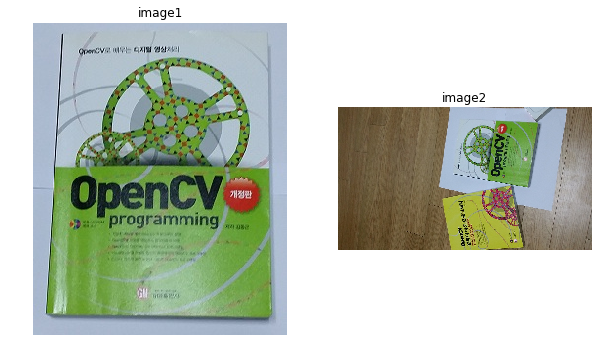

In [20]:
src1_bgr = cv2.imread('./data/book1.jpg') #templete
src2_bgr = cv2.imread('./data/book2.jpg') 

img1 = cv2.cvtColor(src1_bgr, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(src2_bgr, cv2.COLOR_BGR2GRAY)

#plt 출력은 rgb

src1_rgb = cv2.cvtColor(src1_bgr, cv2.COLOR_BGR2RGB)
src2_rgb = cv2.cvtColor(src2_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10, 30)) #캔버스사이즈 지정

image1 = plt.subplot(1, 2, 1) #행, 열, 그릴 인덱스 
image1.set_title('image1')
plt.axis('off') #눈금 없앰
plt.imshow(src1_rgb)

image2 = plt.subplot(1, 2, 2)
image2.set_title('image2')
plt.axis('off')
plt.imshow(src2_rgb)

In [21]:

#1. descriptor

orb = cv2.ORB_create(nfeatures = 1000) #상위 1000개만 사용
brisk = cv2.BRISK_create()
detector = [orb, brisk]

didx = 0 #orb 쓰겠다 / 1: brisk
kp1, des1 = detector[didx].detectAndCompute(img1, None) 
kp2, des2 = detector[didx].detectAndCompute(img2, None)


# of matches = 340
matches[[i] = (queryidx:310, trainidx:215, distance : 10.0)
matches[[i] = (queryidx:413, trainidx:328, distance : 12.0)
matches[[i] = (queryidx:355, trainidx:127, distance : 15.0)
matches[[i] = (queryidx:430, trainidx:361, distance : 15.0)
matches[[i] = (queryidx:236, trainidx:148, distance : 16.0)
matches[[i] = (queryidx:615, trainidx:459, distance : 17.0)
matches[[i] = (queryidx:685, trainidx:650, distance : 17.0)
matches[[i] = (queryidx:224, trainidx:149, distance : 18.0)
matches[[i] = (queryidx:428, trainidx:391, distance : 18.0)
matches[[i] = (queryidx:495, trainidx:385, distance : 18.0)


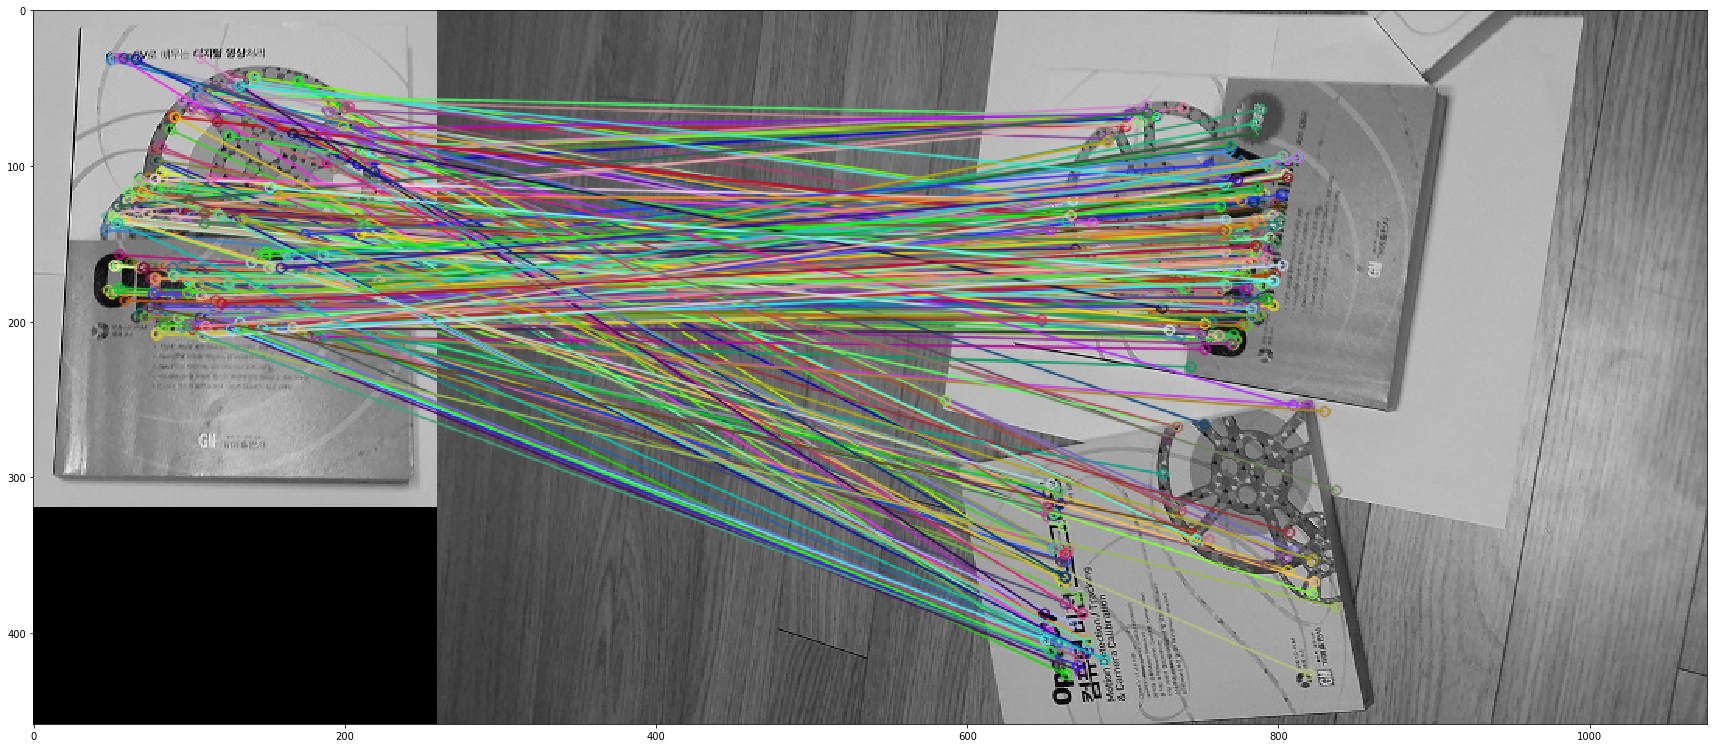

In [30]:
#2. matcher

bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck = True)
flann = cv2.FlannBasedMatcher_create()
matcher = [bf, flann]

midx = 0

try:
    matches = matcher[midx].match(des1, des2)
except: #에러나면(인자가 다름)
    matches = matcher[midx].match(np.float32(des1), np.float32(des2))
    
matches = sorted(matches, key = lambda x:x.distance) #람다함수로 소트(디스턴트 값 기준)
print(f'# of matches = {len(matches)}')
for i, m in enumerate(matches[:10]): #상위 10개 매칭된 것만 프린트 / 거리가 짧을수록 잘 맞는 것
    print(f'matches[[i] = (queryidx:{m.queryIdx}, trainidx:{m.trainIdx}, distance : {m.distance})') #1인덱스, 2인덱스, 둘의 거리 
    
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags = 2) 
plt.figure(figsize = (30, 60))
plt.imshow(img3)
plt.show()

# of good matches = 53


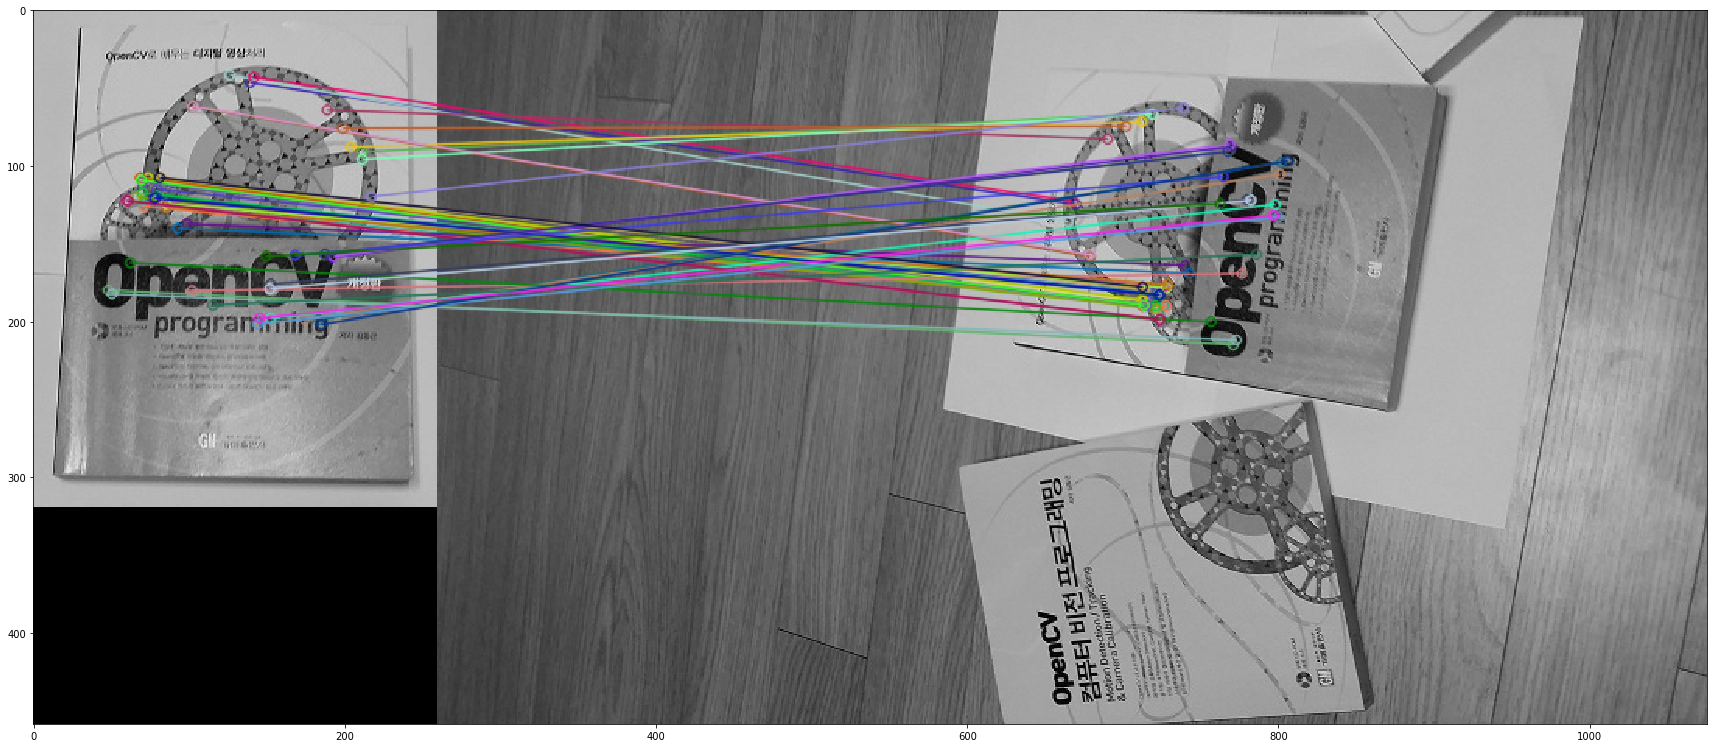

In [36]:
minDist = matches[0].distance
good_matches = list(filter(lambda m:m.distance <= 3 * minDist, matches)) #임의로 정함
print(f'# of good matches = {len(good_matches)}')
if(len(good_matches) < 5):
    print("sorry, too small good matches")
    exit()
    
img4 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags = 2)
plt.figure(figsize = (30, 60))
plt.imshow(img4)
plt.show()